In [1]:
%load_ext autoreload
%autoreload 2

import RIS_gravity_inversion.inversion as inv 

from antarctic_plots import utils, regions, maps, fetch
import numpy as np
import pandas as pd
import xarray as xr
# make beep sound when notify is called at end of long-running cells
from IPython.display import Audio
wave = np.sin(2*np.pi*400*np.arange(10000*1)/10000)
notify = Audio(wave, rate=10000, autoplay=True)

import os 
os.getcwd()
%load_ext snakeviz

c:\Users\matthewt\AppData\Local\miniforge3\envs\grav_inv_ant_plots\lib\site-packages\xarray\backends\cfgrib_.py:29: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(


#  Setup inversion and layers

filtering and resampling ice from 1000m to 10000m
filtering and resampling water from 1000m to 10000m
filtering and resampling bathymetry from 1000m to 10000m
ice: 19600 points, elevations:3700m to 0m
water: 19600 points, elevations:3698m to -2866m
bathymetry: 19600 points, elevations:3698m to -4063m
gravity: 5220 points
gravity avg. elevation: 1000
bathymetry control points:10475932


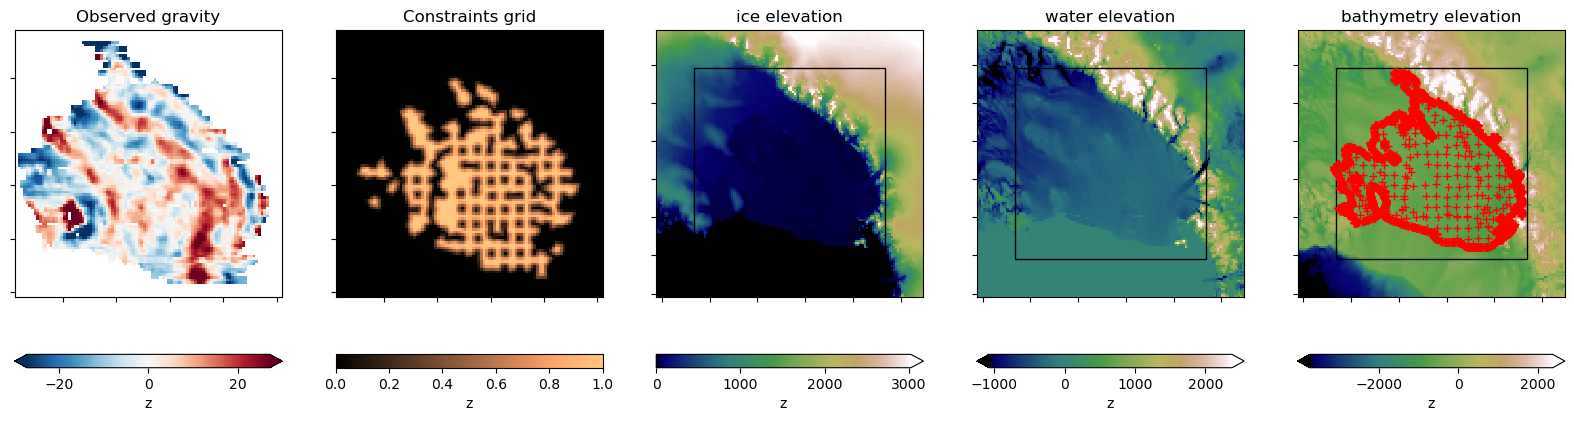

In [9]:
# starting inversion region is 1,000km x 1,000km, choose whether to zoom in, shift the 
# region to the North or West, or change the width of the buffer zone. 

inv_reg, buffer_reg = utils.alter_region(
    starting_region = [-580000, 420000, -1420000, -420000],
    zoom = 0,#400e3,
    n_shift = 0,
    w_shift = 0,#100e3,
    buffer = 200e3,
    )

returned = inv.import_layers(
    layers_list = [
        'ice',
        'water',
        'bathymetry',
        # 'basement',
        # 'moho',
        ], 
    spacing_list = [
        10e3,
        10e3,
        10e3,
        # 10e3,
        # 20e3,
        ], 
    rho_list = [
        920, #890 to 917 from Muto et al. 2013
        1030, #from Muto et al. 2013
        2300,
        # 2670,
        # 3300,
        ],
    fname_list = [
        # SURFACE 
            'inversion_layers/bedmachine/BedMachine_surface_filled.nc',
        # ICEBASE
            'inversion_layers/bedmachine/BedMachine_icebase_filled.nc',
        # BED/BATHYMETRY
            # 'bathymetry_data/bedmap_bedmachine_RIGGS_grd_fill.nc',
            # 'bathymetry_data/bedmap2_bed_regional.nc',
            'inversion_layers/bedmachine/BedMachine_bed.nc',
        # BASEMENT
            # 'inversion_layers/ANTASed_mag_basement_filled.nc',
            # 'inversion_layers/RE_basement_BedMachinebed_filled.nc',
            # 'inversion_layers/lindeque_basement.nc',
        # MOHO
            # 'inversion_layers/An_moho_filt.nc',
            # 'inversion_layers/Shen_moho.nc',
            # 'inversion_layers/Pappa_moho.nc',
        ],
    grav_spacing = 10e3, 
    active_layer='bathymetry',
    buffer_region = buffer_reg,
    inversion_region = inv_reg,

    # Choose between grid and csv, similar comp. times
    # grav_file='gravity_data/rosetta_eq_source_up_continued_Gobs.nc',
    grav_file='gravity_data/rosetta_eq_source_up_continued.csv',
    # grav_file = 'gravity_data/ant4d_gravity_epsg_5k.nc',

    constraints=True,
    constraints_file='constraints_grid/constraints_grid.nc',
    constraints_points='bathymetry_data/bedmachine_RIGGS.csv',
    
    plot=True,
    # plot_type='pygmt',  # 50sec with csv, 53sec with nc
    plot_type='xarray', # 11 sec with csv, 11sec with nc
    plot_region=buffer_reg,
    power_spectrum=False,
    )
layers, grav, grav_spacing, constraints_grid, constraints_df, constraints_RIS_df = returned

# Make prism layers

bathymetry top: -303m and bottom: -4063m
water top: 29m and bottom: -303m
ice top: 831m and bottom: 29m


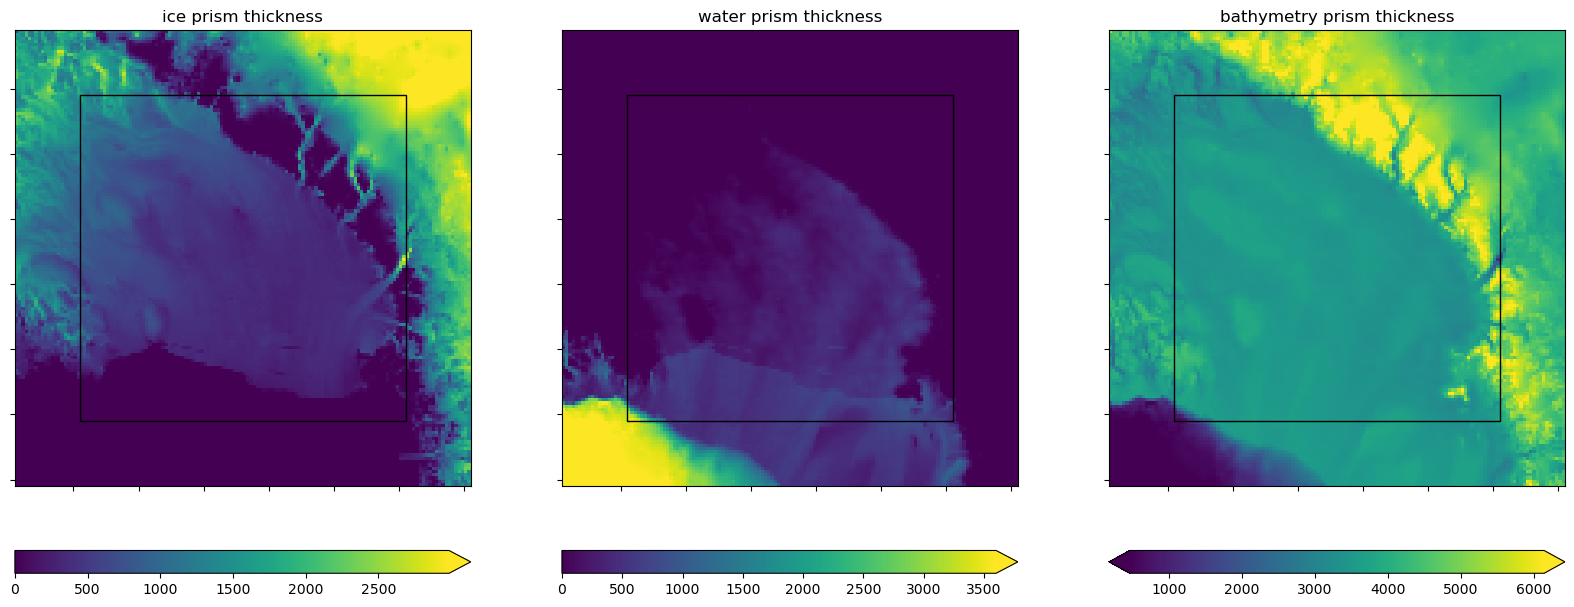

In [10]:
inv.grids_to_prism_layers(
    layers, 
    plot=True, 
    # plot_region=inv_reg,
    plot_type='2D', 
    # plot_type='3D',
    buffer_region = buffer_reg,
    inversion_region = inv_reg,
    ) 

# Forward gravity

using supplied DataFrame for observation points
19600 prisms in ice layer
finished ice layer
19600 prisms in water layer
finished water layer
19600 prisms in bathymetry layer
finished bathymetry layer


,x,y,Gobs,z,ice_forward_grav,water_forward_grav,bathymetry_forward_grav,forward_total
count,5220.000000,5.220000e+03,5.220000e+03,5220.0,5.220000e+03,5.220000e+03,5.220000e+03,5.220000e+03
mean,-93142.720307,-9.876882e+05,1.742327e-16,1000.0,3.484654e-16,-1.393862e-15,2.134351e-14,2.038523e-14
std,225963.763199,2.006838e+05,1.318731e+01,0.0,6.837908e+00,7.889858e+00,1.318629e+01,1.083385e+01
min,-562500.000000,-1.362500e+06,-8.050747e+01,1000.0,-1.815804e+01,-1.114276e+01,-4.559491e+01,-5.673684e+01
25%,-265000.000000,-1.145000e+06,-7.683984e+00,1000.0,-3.188900e+00,-7.092414e+00,-8.096607e+00,-5.425402e+00
50%,-95000.000000,-9.950000e+05,3.147559e-01,1000.0,-1.339774e+00,-2.341020e-01,-6.538169e-01,4.264779e-01
75%,85000.000000,-8.450000e+05,7.821449e+00,1000.0,3.004880e+00,5.647968e+00,6.993220e+00,4.996830e+00
max,362500.000000,-4.675000e+05,6.975915e+01,1000.0,3.413750e+01,2.533991e+01,1.382317e+02,1.282324e+02


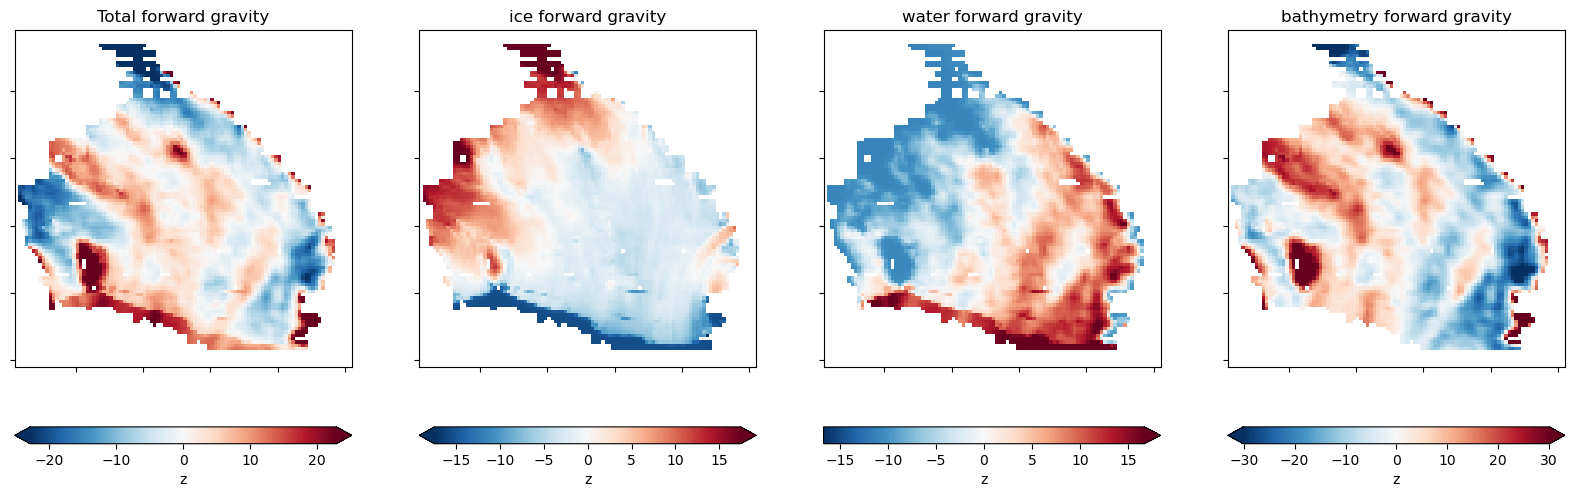

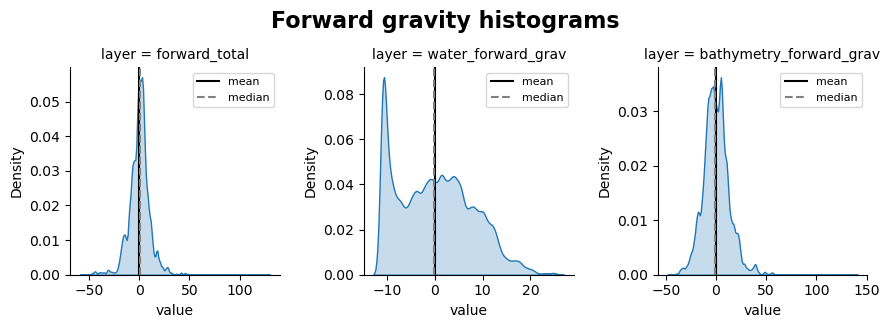

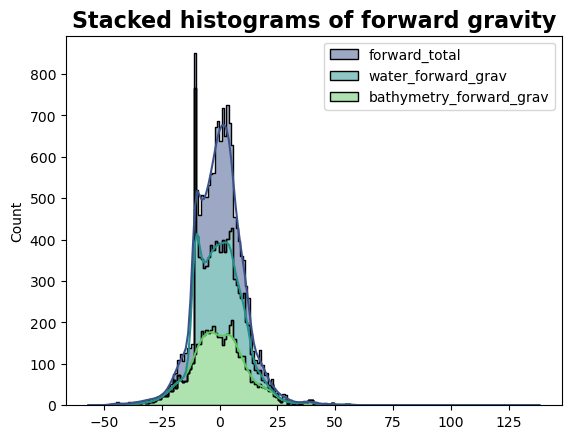

In [27]:
# use below calc at full grid extent, not just grav observation points
# grav = utils.make_grid(inv_reg, grav_spacing, 1000, "z")

df_forward = inv.forward_grav_layers(
    layers, 
    grav,  
    plot=True,
    grav_spacing=grav_spacing,
    inversion_region = inv_reg,
    exclude_layers=['ice'],
    plot_dists=True,
    # power_spectrum=True,
    )
df_forward.describe()
# 40,000 prisms, 17 secs

# Anomalies

Root mean squared residual: 8.17mGal


,x,y,Gobs,z,ice_forward_grav,water_forward_grav,bathymetry_forward_grav,forward_total,grav_corrected,misfit,reg,res
count,5220.000000,5.220000e+03,5.220000e+03,5220.0,5.220000e+03,5.220000e+03,5.220000e+03,5.220000e+03,5.220000e+03,5.220000e+03,5220.000000,5220.000000
mean,-93142.720307,-9.876882e+05,1.742327e-16,1000.0,3.484654e-16,-1.393862e-15,2.134351e-14,2.038523e-14,-6.969308e-16,-2.090792e-14,0.200800,-0.200800
std,225963.763199,2.006838e+05,1.318731e+01,0.0,6.837908e+00,7.889858e+00,1.318629e+01,1.083385e+01,1.593590e+01,1.373710e+01,9.084458,8.173087
min,-562500.000000,-1.362500e+06,-8.050747e+01,1000.0,-1.815804e+01,-1.114276e+01,-4.559491e+01,-5.673684e+01,-1.028885e+02,-1.221581e+02,-27.384847,-102.770669
25%,-265000.000000,-1.145000e+06,-7.683984e+00,1000.0,-3.188900e+00,-7.092414e+00,-8.096607e+00,-5.425402e+00,-8.842956e+00,-7.626648e+00,-5.521338,-3.753541
50%,-95000.000000,-9.950000e+05,3.147559e-01,1000.0,-1.339774e+00,-2.341020e-01,-6.538169e-01,4.264779e-01,2.005868e+00,4.688371e-01,-0.495572,0.104193
75%,85000.000000,-8.450000e+05,7.821449e+00,1000.0,3.004880e+00,5.647968e+00,6.993220e+00,4.996830e+00,1.007045e+01,8.243724e+00,5.384766,4.069450
max,362500.000000,-4.675000e+05,6.975915e+01,1000.0,3.413750e+01,2.533991e+01,1.382317e+02,1.282324e+02,5.793497e+01,5.054038e+01,26.518826,47.366201


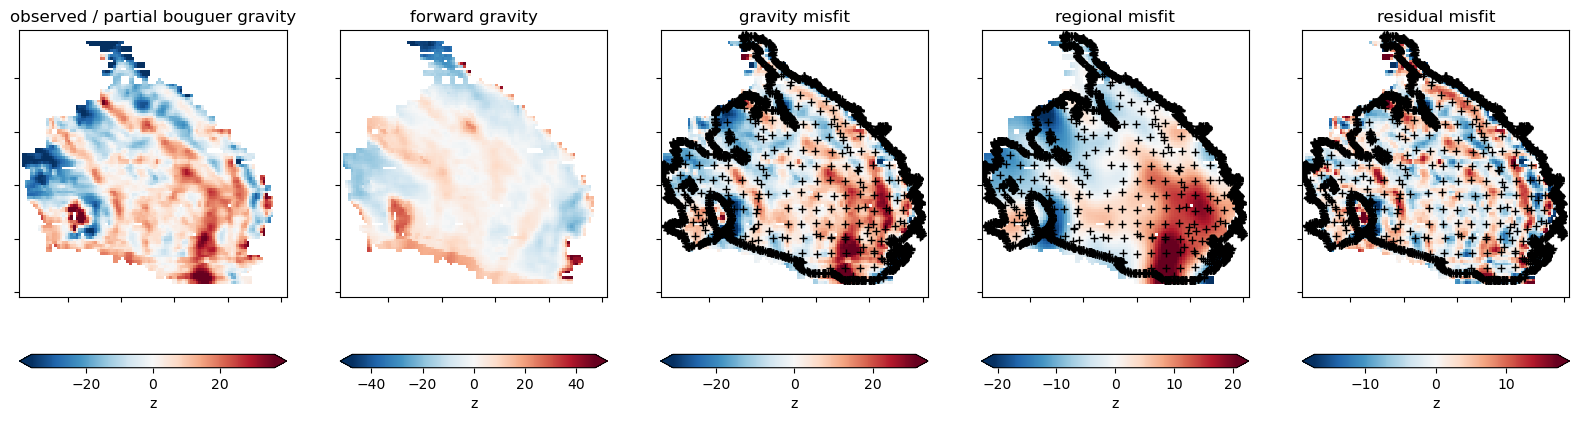

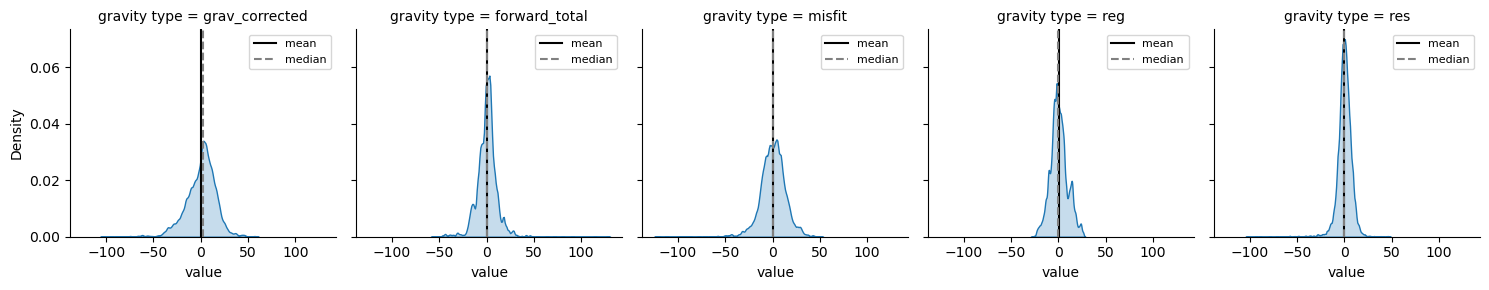

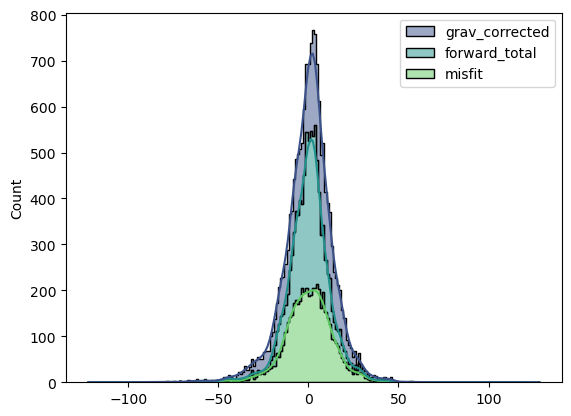

In [28]:
filter='g200e3'
df_anomalies = inv.anomalies(
        layers, 
        df_forward,
        grav_spacing, 
        'filter', 
        filter=filter,
        inversion_region=inv_reg,
        corrections=['ice'], 
        plot=True, 
        plot_constraints=True,
        constraints2plot=constraints_RIS_df,
        plot_dists=True,
        # power_spectrum=True,
        )
df_anomalies.describe()

Root mean squared residual: 12.99mGal


,x,y,Gobs,z,ice_forward_grav,water_forward_grav,bathymetry_forward_grav,forward_total,grav_corrected,misfit,reg,res
count,5220.000000,5.220000e+03,5.220000e+03,5220.0,5.220000e+03,5.220000e+03,5.220000e+03,5.220000e+03,5.220000e+03,5.220000e+03,5220.000000,5220.000000
mean,-93142.720307,-9.876882e+05,1.742327e-16,1000.0,3.484654e-16,-1.393862e-15,2.134351e-14,2.038523e-14,-6.969308e-16,-2.090792e-14,-1.351762,1.351762
std,225963.763199,2.006838e+05,1.318731e+01,0.0,6.837908e+00,7.889858e+00,1.318629e+01,1.083385e+01,1.593590e+01,1.373710e+01,9.512613,12.924516
min,-562500.000000,-1.362500e+06,-8.050747e+01,1000.0,-1.815804e+01,-1.114276e+01,-4.559491e+01,-5.673684e+01,-1.028885e+02,-1.221581e+02,-38.598324,-125.345790
25%,-265000.000000,-1.145000e+06,-7.683984e+00,1000.0,-3.188900e+00,-7.092414e+00,-8.096607e+00,-5.425402e+00,-8.842956e+00,-7.626648e+00,-6.147457,-6.108657
50%,-95000.000000,-9.950000e+05,3.147559e-01,1000.0,-1.339774e+00,-2.341020e-01,-6.538169e-01,4.264779e-01,2.005868e+00,4.688371e-01,-0.400195,0.595309
75%,85000.000000,-8.450000e+05,7.821449e+00,1000.0,3.004880e+00,5.647968e+00,6.993220e+00,4.996830e+00,1.007045e+01,8.243724e+00,5.791538,8.730246
max,362500.000000,-4.675000e+05,6.975915e+01,1000.0,3.413750e+01,2.533991e+01,1.382317e+02,1.282324e+02,5.793497e+01,5.054038e+01,13.190740,68.464080


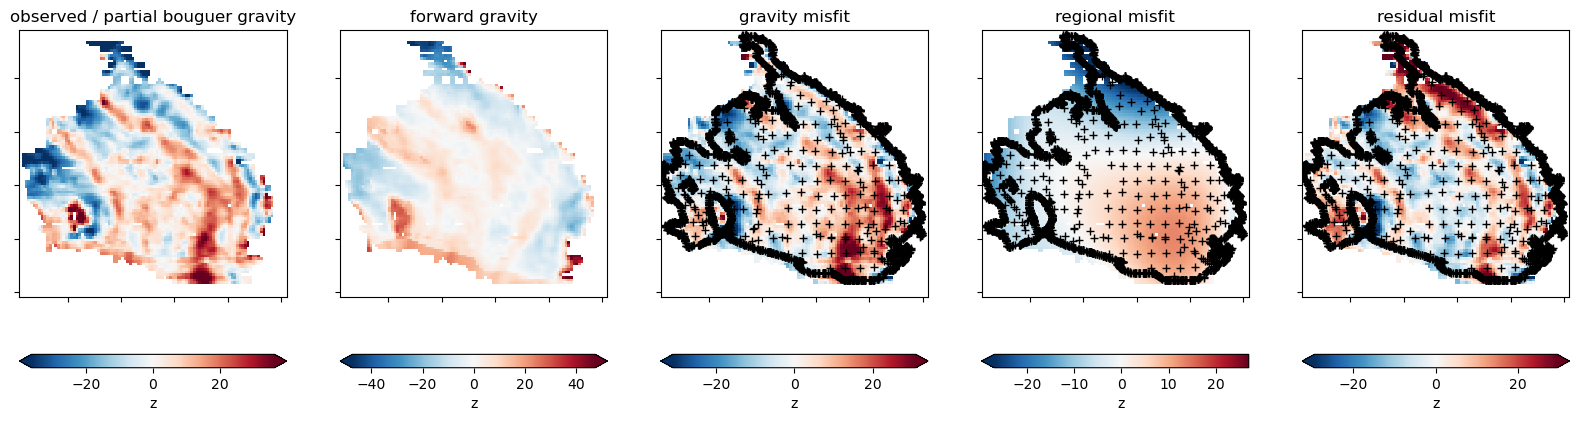

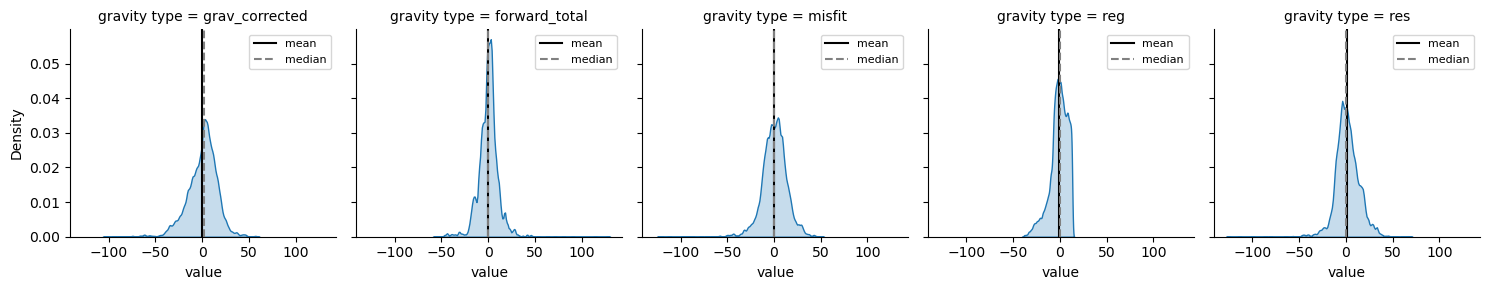

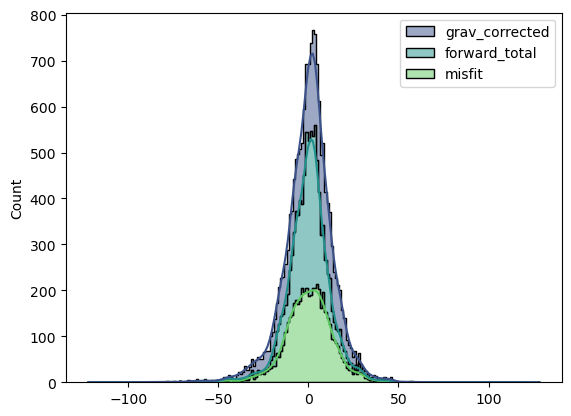

In [29]:
trend=4
df_anomalies = inv.anomalies(
        layers, 
        df_forward,
        grav_spacing, 
        'trend', 
        trend=trend,
        inversion_region=inv_reg,
        corrections=['ice'], 
        plot=True, 
        plot_constraints=True,
        constraints2plot=constraints_RIS_df,
        plot_dists=True,
        # power_spectrum=True,
        )
df_anomalies.describe()

Root mean squared residual: 5.57mGal


,x,y,Gobs,z,ice_forward_grav,water_forward_grav,bathymetry_forward_grav,forward_total,grav_corrected,misfit,reg,res
count,5220.000000,5.220000e+03,5.220000e+03,5220.0,5.220000e+03,5.220000e+03,5.220000e+03,5.220000e+03,5.220000e+03,5.220000e+03,5220.000000,5220.000000
mean,-93142.720307,-9.876882e+05,1.742327e-16,1000.0,3.484654e-16,-1.393862e-15,2.134351e-14,2.038523e-14,-6.969308e-16,-2.090792e-14,0.264253,-0.264253
std,225963.763199,2.006838e+05,1.318731e+01,0.0,6.837908e+00,7.889858e+00,1.318629e+01,1.083385e+01,1.593590e+01,1.373710e+01,13.232824,5.559802
min,-562500.000000,-1.362500e+06,-8.050747e+01,1000.0,-1.815804e+01,-1.114276e+01,-4.559491e+01,-5.673684e+01,-1.028885e+02,-1.221581e+02,-105.244739,-64.898701
25%,-265000.000000,-1.145000e+06,-7.683984e+00,1000.0,-3.188900e+00,-7.092414e+00,-8.096607e+00,-5.425402e+00,-8.842956e+00,-7.626648e+00,-7.343199,-2.394552
50%,-95000.000000,-9.950000e+05,3.147559e-01,1000.0,-1.339774e+00,-2.341020e-01,-6.538169e-01,4.264779e-01,2.005868e+00,4.688371e-01,0.418229,-0.123337
75%,85000.000000,-8.450000e+05,7.821449e+00,1000.0,3.004880e+00,5.647968e+00,6.993220e+00,4.996830e+00,1.007045e+01,8.243724e+00,8.883243,2.079333
max,362500.000000,-4.675000e+05,6.975915e+01,1000.0,3.413750e+01,2.533991e+01,1.382317e+02,1.282324e+02,5.793497e+01,5.054038e+01,42.700362,30.189873


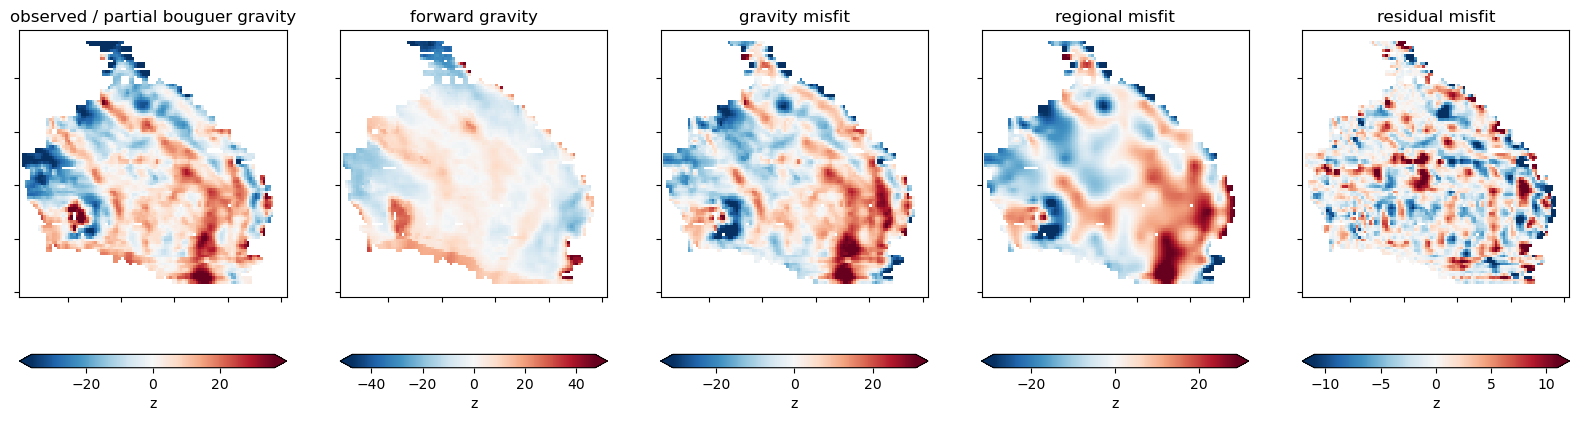

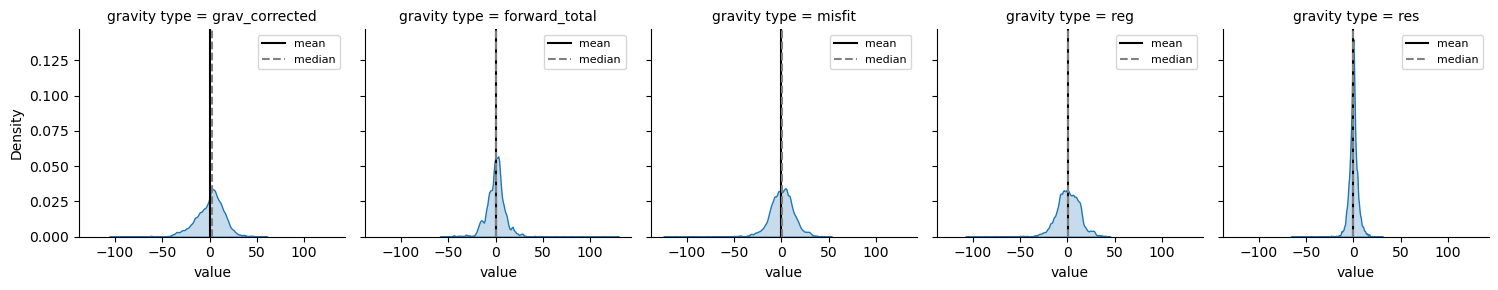

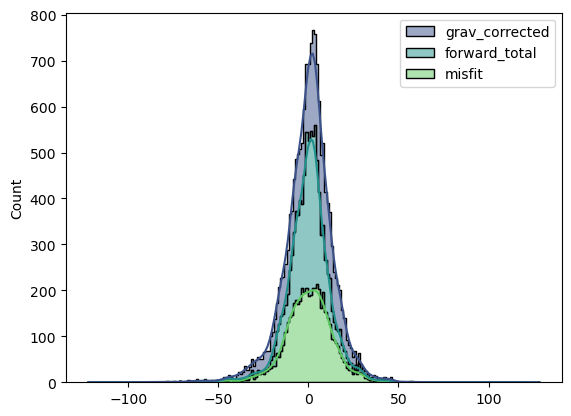

In [30]:
df_anomalies = inv.anomalies(
        layers, 
        df_forward, 
        grav_spacing, 
        'constraints', 
        constraints=constraints_df,
        constraints2plot=constraints_RIS_df,
        inversion_region=inv_reg,
        corrections=['ice'], 
        plot=True, 
        plot_constraints=False,
        plot_dists=True,
        # power_spectrum=True,
        )
df_anomalies.describe()

# Geo inversion

In [31]:
# %%snakeviz --new-tab
regional_method='constraints'

topo_results, grav_results = inv.geo_inversion(
    active_layer='bathymetry',
    layers=layers, 
    input_grav=df_anomalies, 
    regional_method = regional_method,
    Max_Iterations=3,
    deriv_type='prisms',
    solver_type='least squares',
    max_layer_change_per_iter=100,

    apply_constraints = False,
    constraints_grid=constraints_grid,
    exclude_layers=['ice'],

    # filter=filter, 
    # trend=trend,
    constraints=constraints_df,

    inversion_region = inv_reg,
    buffer_region=buffer_reg,
    grav_spacing = grav_spacing,

    # save_results = True,
    # fname_topo = "topo_results_5k_constraints_base",
    # fname_gravity = "gravity_results_5k_constraints_base",
    ) 

notify
# 17 secs for least squares

##################################
iteration 1
initial RMS residual = 5.57mGal
RMS layer correction 24.56m
constraints not applied
calculating updated forward gravity
updating the misfits
Root mean squared residual: 3.74mGal
##################################
iteration 2
initial RMS residual = 3.74mGal
RMS layer correction 15.0m
constraints not applied
calculating updated forward gravity
updating the misfits
Root mean squared residual: 2.78mGal
##################################
iteration 3
initial RMS residual = 2.78mGal
RMS layer correction 9.76m
constraints not applied
calculating updated forward gravity
updating the misfits
Root mean squared residual: 2.24mGal
Inversion terminated after 3 iterations with least-squares norm=5 because maximum number of iterations (3) reached


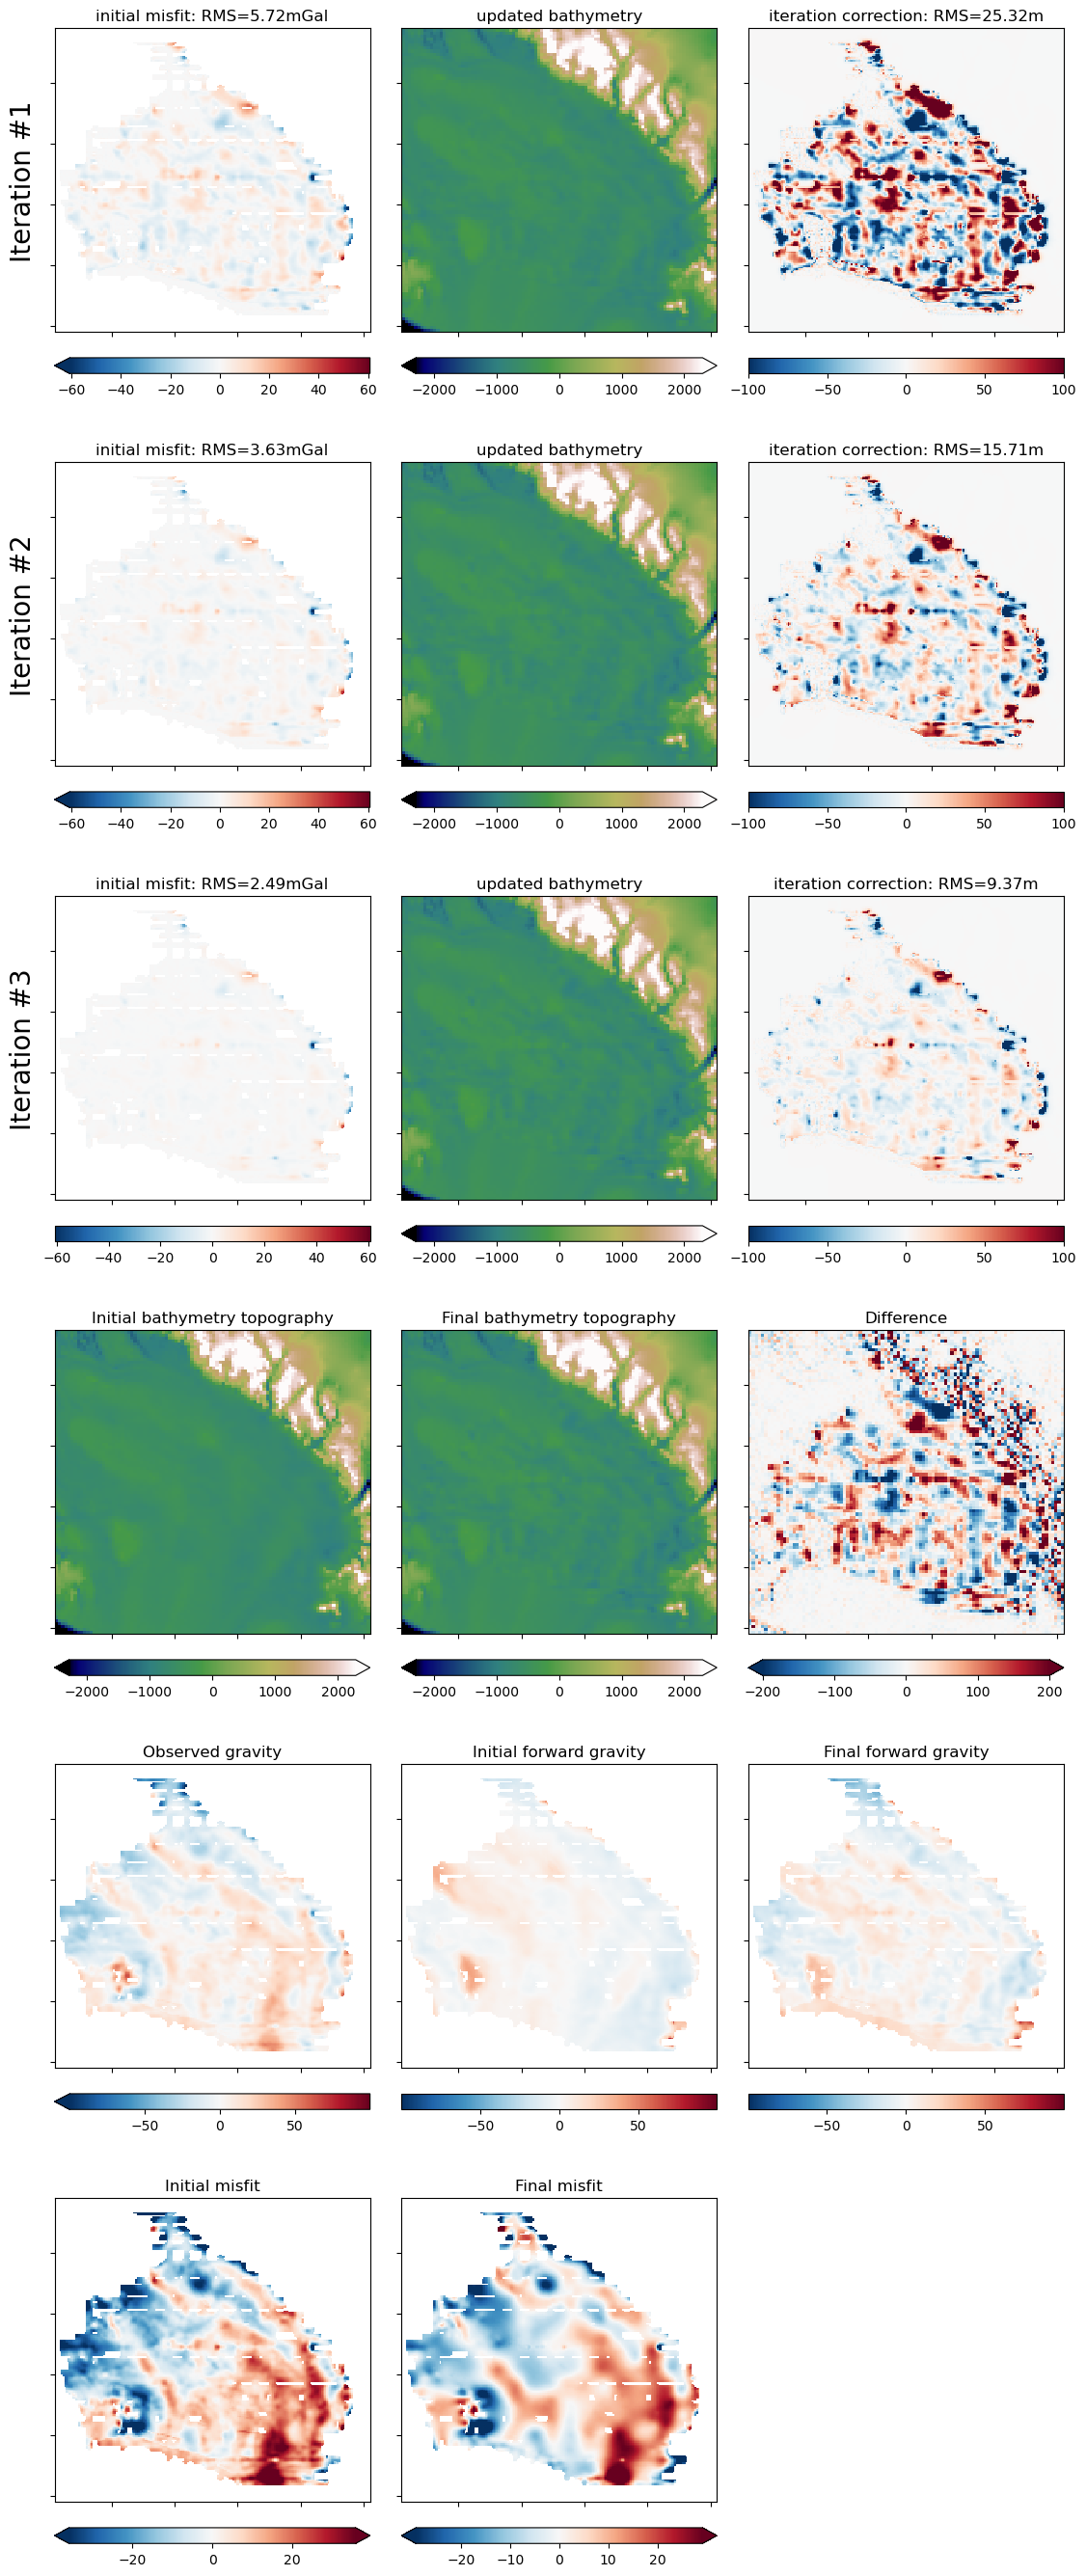

In [33]:
inv.plot_inversion_results(
    # grav_results,
    "results/gravity_results_5k_constraints_no_base.csv",
    # topo_results,
    "results/topo_results_5k_constraints_no_base.csv",
    layers,

    active_layer = 'bathymetry',
    grav_spacing = 5e3,#grav_spacing,
    epsg = 'epsg:3031',
    
    inversion_region = inv_reg,
    # plot_region = buffer_reg,
    plot_constraints = False,
    # constraints = constraints_RIS_df,
    
    save_topo_nc=True,
    topo_fname='inverted_topo_5k_constraints_no_base',

    save_residual_nc=True,
    residual_fname='initial_residual_5k_constraints_no_base',
)


grid regions and spacing match


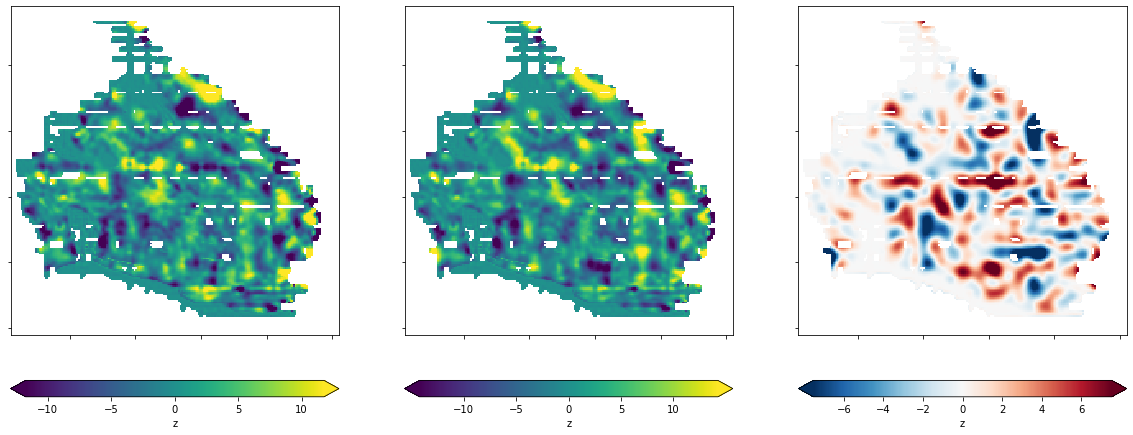

In [11]:
dif = utils.grd_compare(
    'results/initial_residual_5k_constraints_no_base.nc', 
    'results/initial_residual_5k_constraints_base.nc',
    robust = True,
    )

grid regions and spacing match


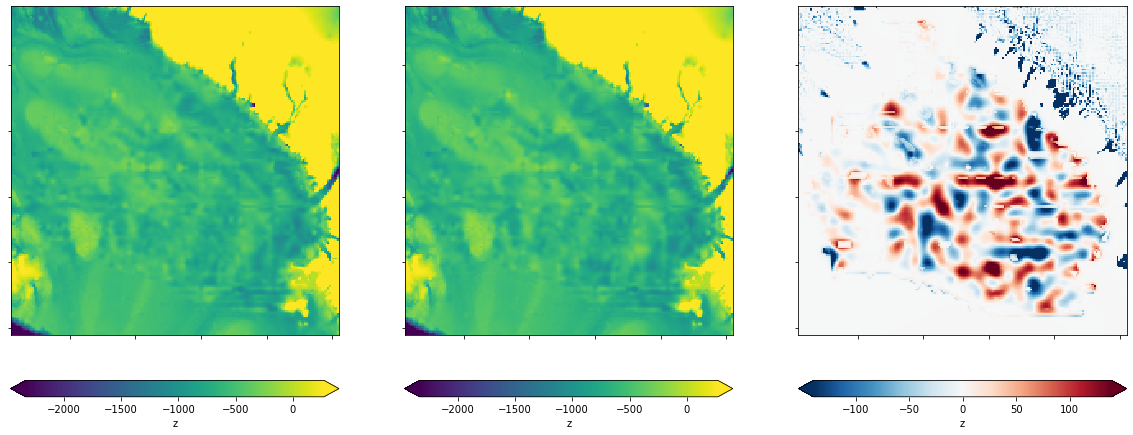

In [12]:
dif = utils.grd_compare(
    'results/inverted_topo_5k_constraints_no_base.nc', 
    'results/inverted_topo_5k_constraints_base.nc',
    shp_mask = "plotting/MEaSUREs_RIS.shp")
    

grid spacings and regions dont match, using smaller spacing (1000m) and inner region.


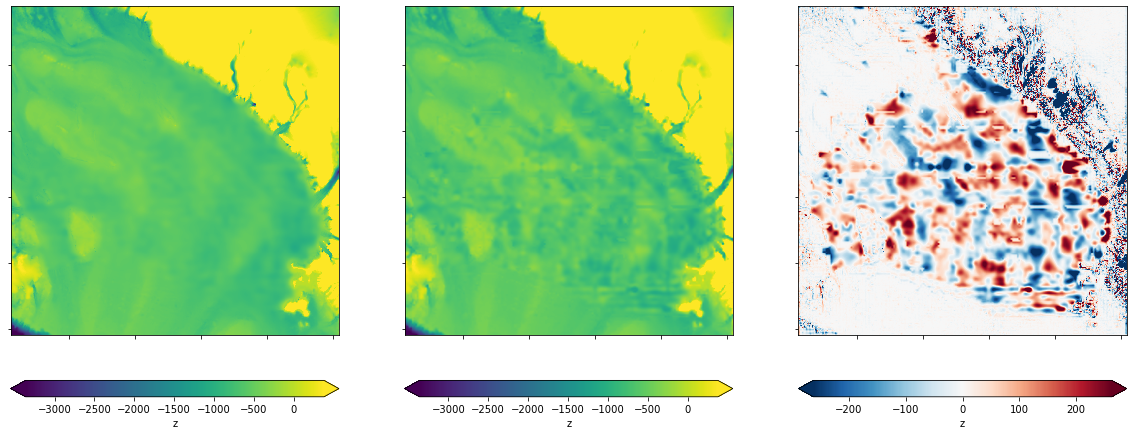

In [10]:
da1 = xr.load_dataarray("inversion_layers/bedmachine/BedMachine_bed.nc")
da2 = xr.load_dataarray('results/inverted_topo_5k_constraints_base.nc')

dif = utils.grd_compare(
    da1, 
    da2,
    shp_mask = "plotting/MEaSUREs_RIS.shp",
    )


In [ ]:
from ipyfastscape import TopoViz3d
ds2 = da2.to_dataset()

app = TopoViz3d(ds2, elevation_var='z')

app.show()

# Density inversion

In [ ]:
# density_inversion(
    # density_layer='bathymetry', 
    # plot=True
    # ) 
#10mins, 200km zoom/5k, 3.5mins 400km zoom/5k (113x113 prisms, 33x33 grav)
# notify